# Title: Prediction of Whether a Candidate Star is a Pulsar or not

## Section 1: Introduction

#### Background Information About Pulsars
Pulsars are rotating neutron stars that emit beams of electromagnetic radiation that is detectable on Earth (Wikimedia Foundation, 2021). Scientists use pulsars to investigate the state of matter, measure distance of cosmic objects, and even use them to test the universal force of gravity (Cofield, 2016). Machine learning classifiers are used in studying and labelling of pulsar candidates for an efficient analysis. In particular, the binary classification system is commonly used (Lyon et al., 2016). 

#### About Our Project
In this project, we wish to answer the question that: 
> Is the unknown star a pulsar based on its value of interested varaibles?

#### About Datasets
We have a dataset contains 12,528 candidates of pulsar star. Since each pulsar produces slightly different emission patterns as they rotate, each candidate's data is averaged over many rotations of the pulsar (Lyon et al., 2016). Each candidate in the dataset is described 8 continuous variables, and a single class variable. The first four statistics are obtained from integrated pulsar profile, which describe a longitude-resolved version of the signal that has been averaged (Lyon et al., 2016). Variables 5 to 8 are obtained from the DM-SNR curve, where DM is a measure of dispersion signal received and SNR is the signal-to-noise ratio (Lyon et al., 2016). The last variable indicates the class of the candidate. 

Variables: 
1. Mean of the integrated profile - the average
2. Standard deviation of the integrated profile - a summary measure of the differences of observations from the mean
3. Excess kurtosis of the integrated profile - a measure to compare the tail with normal distribution
4. Skewness of the integrated profile - a measure of the degree of symmetry
5. Mean of the DM-SNR curve - the average
6. Standard deviation of the DM-SNR curve - a summary measure of the differences of observations from the mean
7. Excess kurtosis of the DM-SNR curve - a measure to compare the tail with normal distribution
8. Skewness of the DM-SNR curve - a measure of the degree of symmetry
9. Class - class of the candidate


## Section 2: Preliminary exploratory data analysis


In [1]:
# Load library
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Reading Data into R

In [2]:
pulsar_train <- read_csv("https://raw.githubusercontent.com/ScottCY/Group-_Project/main/pulsar_data_train.csv")
head(pulsar_train)
pulsar_test <- read_csv("https://raw.githubusercontent.com/ScottCY/Group-_Project/main/pulsar_data_test.csv")
head(pulsar_test)

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,0
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,0


Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_logical()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
116.90625,48.92060,0.1860463,-0.1298151,3.037625,17.73710,8.1226208,78.813405,NA
75.58594,34.38625,2.0254984,8.6529130,3.765050,21.89705,7.0481886,55.878791,NA
103.27344,46.99663,0.5042952,0.8210883,2.244983,15.62257,9.3304985,105.134942,NA
101.07812,48.58749,1.0114270,1.1518699,81.887960,81.46414,0.4851051,-1.117904,NA
113.22656,48.60880,0.2915380,0.2921203,6.291806,26.58506,4.5401376,21.708268,NA
85.47656,38.05279,NA,1.9150973,2.637124,NA,9.0015001,NA,NA


By looking at these two dataset given, we can see that the testing dataset has only NA value in it. Therefore, we have no way to see how accurate our classifier is after the training process. Hence, we would devide the training set into training and testing by ourselves to do this classfication. The reason for us to choose prop = 0.75 in initial_split is because 0.75 is a great prop that gives us enough data for both training and testing dataset.

#### Tidy Format

In [3]:
#The data is already in tidy format. 
#We rename the column names and change the category of target_class to factor to make it more consise.

set.seed(100)
pulsar_data <- rename(pulsar_train, integrated_profile_mean = `Mean of the integrated profile`,
                                integrated_profile_standard_deviation = `Standard deviation of the integrated profile`,
                                 integrated_profile_kurtosis = `Excess kurtosis of the integrated profile`,
                                 integrated_profile_skewness = `Skewness of the integrated profile`,
                                 DMSNR_curve_mean = `Mean of the DM-SNR curve`,
                                 DMSNR_curve_standard_deviation = `Standard deviation of the DM-SNR curve`,
                                 DMSNR_curve_kurtosis = `Excess kurtosis of the DM-SNR curve`,
                                 DMSNR_curve_skewness = `Skewness of the DM-SNR curve`) %>%
                     mutate(target_class = as_factor(target_class))

pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = target_class)  
pulsar_train_tidy <- training(pulsar_split) 
pulsar_test_tidy <- testing(pulsar_split) 

head(pulsar_train_tidy)  
head(pulsar_test_tidy)

integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
109.40625,55.91252,0.5651059,0.05624666,2.797659,19.49653,9.443282,97.374578,0
95.00781,40.21981,0.3475781,1.15316438,2.770067,18.21774,7.851205,70.801938,0
109.15625,47.00223,0.3941818,0.19029569,4.578595,NA,5.702532,36.342493,0


integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.37548466,-0.01316549,3.168896,18.39937,7.4498741,65.159298,0
76.96875,36.17556,0.71289786,3.38871856,2.399666,17.57100,9.4146523,102.722975,0
121.00781,47.17694,0.22970813,0.09133623,2.036789,NA,9.5460511,112.131721,0
79.34375,42.40217,1.06341291,2.24437669,141.641304,NA,-0.7008088,-1.200653,0
128.73438,48.69556,NA,0.30780294,5.307692,25.16230,5.4975439,32.739833,0
133.12500,59.95728,0.01285505,-0.80489024,31.553512,65.23625,1.7351796,1.358508,0


#### Summarize the data 

* Table 1 (summarizes all given predictors)

In [4]:
# Gather necessary summary in this cell
Col1 <- pulsar_train_tidy$integrated_profile_mean
Col2 <- pulsar_train_tidy$integrated_profile_standard_deviation
Col3 <- pulsar_train_tidy$integrated_profile_kurtosis
Col4 <- pulsar_train_tidy$integrated_profile_skewness
Col5 <- pulsar_train_tidy$DMSNR_curve_mean
Col6 <- pulsar_train_tidy$DMSNR_curve_standard_deviation
Col7 <- pulsar_train_tidy$DMSNR_curve_kurtosis
Col8 <- pulsar_train_tidy$DMSNR_curve_skewness

summary_column1 <- summary(Col1, na.rm = TRUE)
summary_column2 <- summary(Col2, na.rm = TRUE)
summary_column3 <- summary(Col3, na.rm = TRUE)
summary_column4 <- summary(Col4, na.rm = TRUE)
summary_column5 <- summary(Col5, na.rm = TRUE)
summary_column6 <- summary(Col6, na.rm = TRUE)
summary_column7 <- summary(Col7, na.rm = TRUE)
summary_column8 <- summary(Col8, na.rm = TRUE)

na_C1 <- sum(is.na(Col1))
na_C2 <- sum(is.na(Col2))
na_C3 <- sum(is.na(Col3))
na_C4 <- sum(is.na(Col4))
na_C5 <- sum(is.na(Col5))
na_C6 <- sum(is.na(Col6))
na_C7 <- sum(is.na(Col7))
na_C8 <- sum(is.na(Col8))

n_observation <- nrow(pulsar_train_tidy) 

In [5]:
# Create summary table for predictors with 5 number summary, number of NA's and total observations. 

row_part1 <- data.frame(rbind(summary_column1,summary_column2, summary_column4, summary_column5 ,summary_column7))
row_part2 <- select(data.frame(rbind(summary_column3,summary_column6,summary_column8)), -NA.s)
predictors_summary <- rbind(row_part1, row_part2)

predictors_table <- setNames(cbind(rownames(predictors_summary), predictors_summary, row.names = NULL), 
         c("data_type", "Minimun", "Q1(25% percentile)",
           "Median", "Mean", "Q3(75% percentile)", "Maximun")) %>% #Add name to first column
         mutate(n = c(1,2,4,5,7,3,6,8)) %>%
         arrange(n) %>%
         mutate(data_type = c("integrated_profile_mean","integrated_profile_standard_deviation","integrated_profile_kurtosis",
                              "integrated_profile_skewness","DMSNR_curve_mean","DMSNR_curve_standard_deviation",
                              "DMSNR_curve_kurtosis","DMSNR_curve_skewness")) %>%
         mutate(number_of_NA = c(na_C1,na_C2,na_C3,na_C4,na_C5,na_C6,na_C7,na_C8)) %>%  #add NA information
         mutate(number_of_data = c(n_observation)) %>% #add number of observations
         select(-n) #remove useless column
predictors_table

data_type,Minimun,Q1(25% percentile),Median,Mean,Q3(75% percentile),Maximun,number_of_NA,number_of_data
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
integrated_profile_mean,5.8125000,100.80273438,115.1796875,111.0312492,127.1093750,189.734375,0,9396
integrated_profile_standard_deviation,24.7720418,42.41396838,46.9415641,46.5581379,51.0457319,91.808628,0,9396
integrated_profile_kurtosis,-1.7380208,0.02404597,0.2217711,0.4816934,0.4736437,8.069522,1294,9396
integrated_profile_skewness,-1.7818883,-0.19036544,0.2012008,1.7973334,0.9250845,68.101622,0,9396
DMSNR_curve_mean,0.2132107,1.91116221,2.7867893,12.8923964,5.5112876,222.421405,0,9396
DMSNR_curve_standard_deviation,7.3704322,14.40314701,18.4194252,26.4305454,28.5857969,110.642211,894,9396
DMSNR_curve_kurtosis,-3.1392696,5.74475086,8.4484346,8.3231343,10.7362074,34.539844,0,9396
DMSNR_curve_skewness,-1.9769756,34.34227439,82.9567659,105.7723140,140.0339925,1191.000837,485,9396


* Table 2 (Summary the target_class)

In [6]:
#Get information about Target class for number of pulsar and non-pulsar
class_table <- group_by(pulsar_train_tidy, target_class) %>%
               summarize(count=n())
name <- c("non-pulsar", "pulsar")
class_table$type <- name
class_table

`summarise()` ungrouping output (override with `.groups` argument)



target_class,count,type
<fct>,<int>,<chr>
0,8511,non-pulsar
1,885,pulsar


#### Visualize the data

* Plot 1 (counts of each type of star)

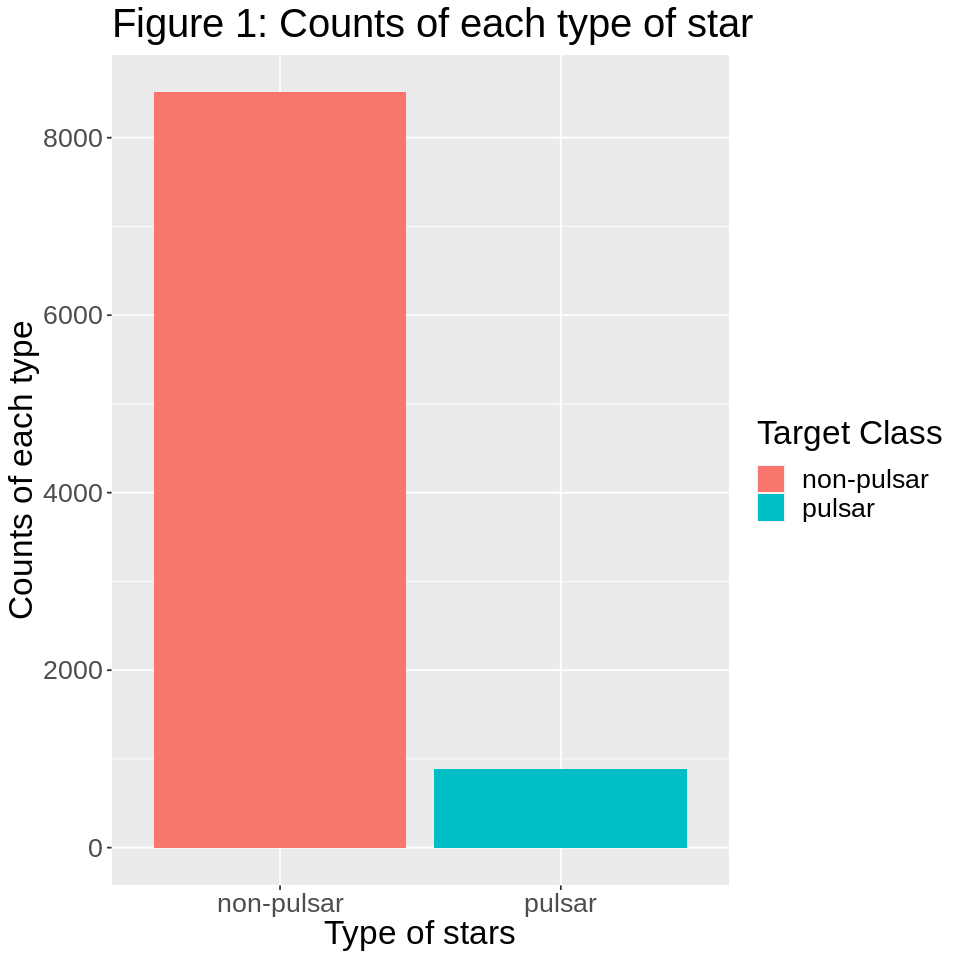

In [7]:
#The chart below visualizes the table above, about the number of pulsar and non-pulsar star.

options(repr.plot.width = 8, repr.plot.height = 8) 
Class_counts_chart <- ggplot(class_table, aes(x = type, y = count, fill = type))+
geom_bar(stat = "identity")+
ggtitle("Figure 1: Counts of each type of star")+
labs(x = "Type of stars", y = "Counts of each type", fill = "Target Class")+
theme(text = element_text(size = 20))
Class_counts_chart

From the bar chart above, we can see that there are much more non-pulsar stars than pulsar stars, which gives us a general idea about the scale of the number of the stars. Also, it will influence our choice of models to predict the target class.

* (Scatterplot about variables related to integrated profile, colored by class)

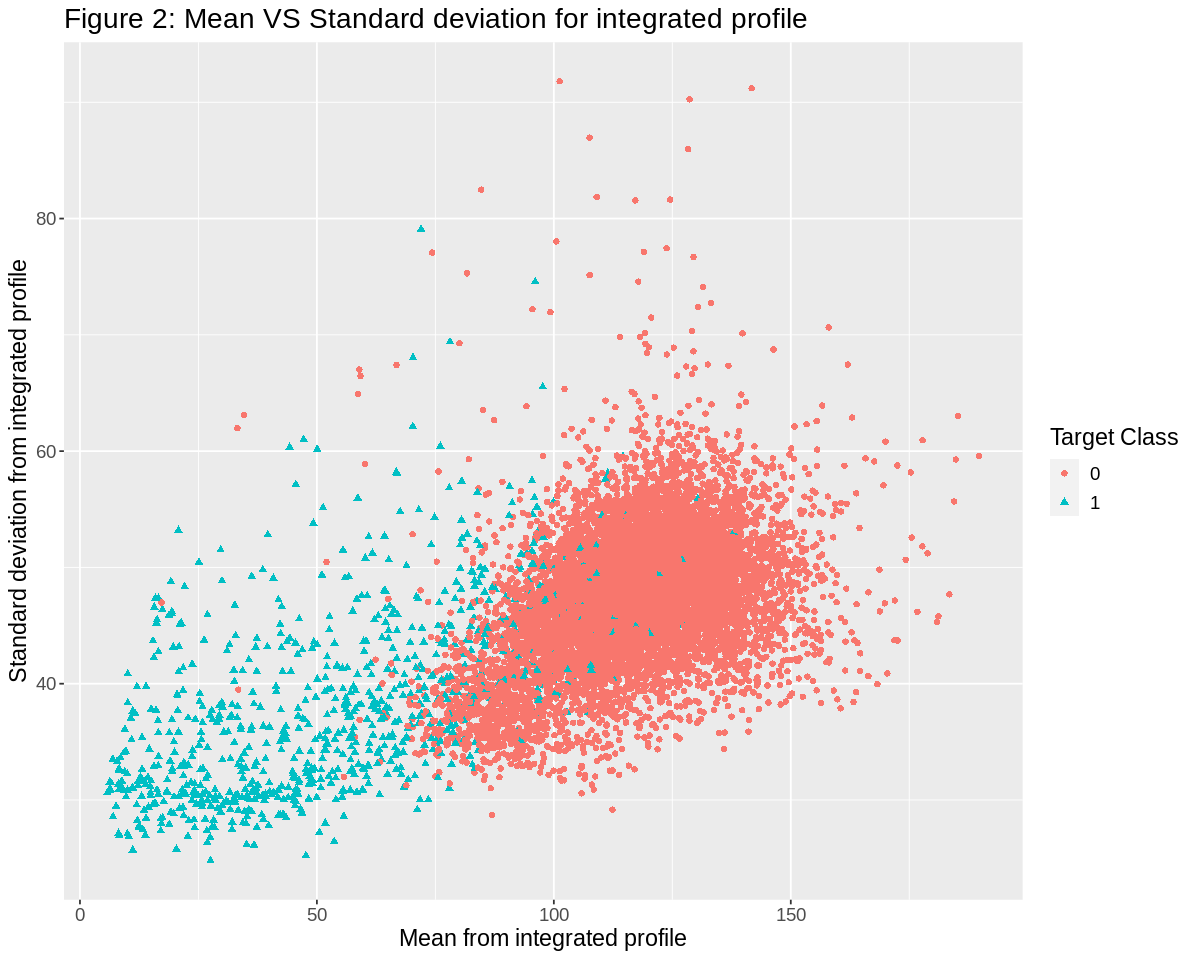

In [41]:
options(repr.plot.width = 10, repr.plot.height = 8)
Integrated_profile_plot <- ggplot(pulsar_train_tidy, 
            aes(x = integrated_profile_mean, y = integrated_profile_standard_deviation, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Figure 2: Mean VS Standard deviation for integrated profile")+
labs(x = "Mean from integrated profile", y = "Standard deviation from integrated profile", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 14))
Integrated_profile_plot                       

From the scatter plot above, it is abvious that these two types of stars have very different distribution: non-pulsar stars have mostly greater means and standard deviations than pulsar stars, which can be a very crucial way for us to predict the target class. That is saying, if we are provided a star with a very high mean and standard deviation in integrated profile, there is a big chance that it is a non-pulsar star.

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”
Warning message:
“Removed 1294 rows containing non-finite values (stat_bin).”


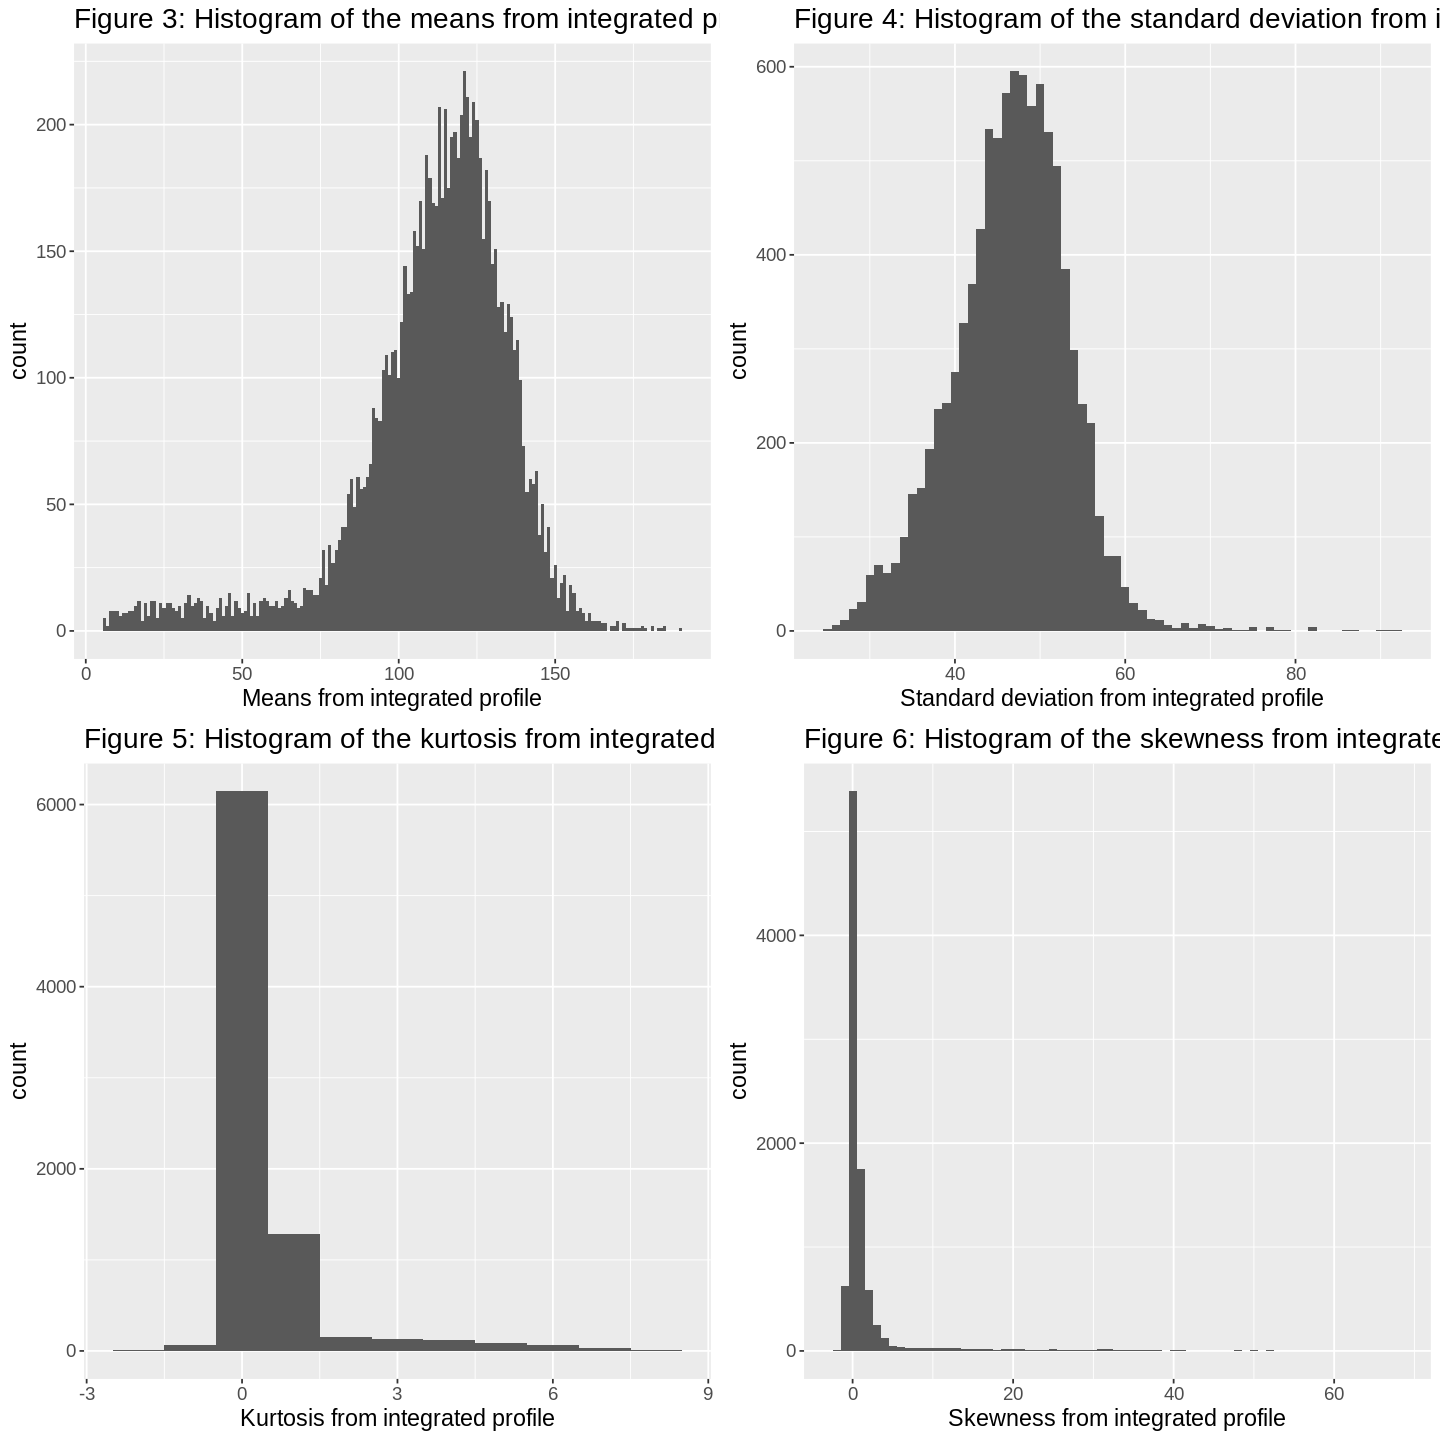

In [9]:
options(repr.plot.width = 12, repr.plot.height = 12)
library(cowplot)

Integrated_profile_plot_2 <- ggplot(pulsar_train_tidy,aes(x = integrated_profile_mean))+
geom_histogram(binwidth = 1)+
ggtitle("Figure 3: Histogram of the means from integrated profile")+
labs(x = "Means from integrated profile")+
theme(text = element_text(size = 14))

Integrated_profile_plot_3 <- ggplot(pulsar_train_tidy,aes(x = integrated_profile_standard_deviation))+
geom_histogram(binwidth = 1)+
ggtitle("Figure 4: Histogram of the standard deviation from integrated profile")+
labs(x = "Standard deviation from integrated profile")+
theme(text = element_text(size = 14))

Integrated_profile_plot_4 <- ggplot(pulsar_train_tidy,aes(x = integrated_profile_kurtosis))+
geom_histogram(binwidth = 1)+
ggtitle("Figure 5: Histogram of the kurtosis from integrated profile")+
labs(x = "Kurtosis from integrated profile")+
theme(text = element_text(size = 14))

Integrated_profile_plot_5 <- ggplot(pulsar_train_tidy,aes(x = integrated_profile_skewness))+
geom_histogram(binwidth = 1)+
ggtitle("Figure 6: Histogram of the skewness from integrated profile")+
labs(x = "Skewness from integrated profile")+
theme(text = element_text(size = 14))

plot_grid(Integrated_profile_plot_2, Integrated_profile_plot_3, Integrated_profile_plot_4, Integrated_profile_plot_5, ncol = 2)

From the four histogram plots above, we can see that the means and the standard deviation from the integrated profile roughly follow a normal ditribution. In terms of the spreading, most of the mean values are between 75 and 150, and most of the standard deviations are from 20 to 60. About the kurtosis and skewness, they both are right skewed distribution, which means most of the kurtosis and skewness of the stars are close to smaller x axis part.

## Section 3: Methods

In this project, we will use classification to predict the unknown class of a star by observed variables. The first step of this data analysis is to perform exploratory analysis. To begin, we load the data and inspect it’s contents. The source provided already split training and testing sets, but after loading we can see that the testing data does not contain any class labels, and cannot be used for evaluating accuracy. Thus, we’ve decided to discard the provided testing set and treat the training set as the complete set of data, which we will split and wrangle.

To clean the data, we renamed the columns into more usable names and changed the target class into a factor, as it will be used as a categorical statistical variable. We’ve split the data into 75% training and 25% testing to ensure there is enough data to perform the cross validation and evaluation of accuracy necessary for a classification analysis.

Next, we created summary tables for the predictor values and target class. For each predictor, we calculated mean, medium, maximum, and minimum values, and counted the number of NA’s and total observations. For the target class, we summarized the total count of each label, pulsar or non-pulsar. 

For visualizations, we created a bar graph of the counts of each label to give a better representation of the imbalance of classes. We also included a scatter plot of the predictors with the clearest pattern of divided classes, which are the standard deviation and mean of the integrated profile. For each predictor, we created a histogram of their observations. This displays the range, mean, and standard deviation of the values.

To begin our data analysis, we will only work with our training data and selected predictor columns. Our data has already been split, and we removed the non-predictor columns and NA observations from both datasets. Since our dataset has an imbalance of classes, we rebalanced our data by replicating the observations for pulsar stars, the rarer class. 

Using the rebalanced training data, we developed a classifier using the tidymodels K-nearest algorithm. In this model, the parameter K determines how it will behave, and we need to find the value of K that produces the most accurate classifier. To do this, we first chose a range of K values to test for accuracy. We chose the range 1-30, skipping by 2, since we have 2 labels in the target class, and an odd number of neighbors ensures that there won’t be a tie for majority vote. 

Next, for each K value in the chosen range, we performed a 5-fold cross validation. In the cross validation, the training data will be split into five sections, one section is the validation set, and the remaining are recombined as the training set. Then a classifier for the K-value will be trained on the recombined training set, and used to predict the classes of the validation. This is done five times, and each section is used as the validation set once. Using these predictions, the accuracy of a K-value can be determined by averaging the prediction accuracy (percent of correct predictions out of total predictions made) of each fold. 

After the cross validation, we created a line graph that plotted each K-value against their estimated prediction accuracy. Based on the plot we determined the best K to be 17, and trained our classifier using this value. With this classifier, we performed a classification of the testing data, and calculated the accuracy to be 92.8%. 

Finally, to visualize our results, we displayed two scatter plots of the testing data with the best predictors on each axis. One is labeled by the actual classes, and the other by predictions.

## Section 4: Results

#### Performing the data analysis

Before we actually performing the training, we choose to first modify the data by choosing only the necessary predictors in training set, and removing all NA values in both training and testing set to avoid bugs in the code.

In [10]:
pulsar_train_tidy_used <- select(pulsar_train_tidy, integrated_profile_mean,
                                 integrated_profile_standard_deviation,
                                 integrated_profile_kurtosis,integrated_profile_skewness,target_class) %>%
          na.omit()
pulsar_test_tidy <-  pulsar_test_tidy %>% na.omit()
head(pulsar_train_tidy_used)
head(pulsar_test_tidy)

integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
130.58594,53.22953,0.1334083,-0.29724164,0
156.39844,48.86594,-0.2159886,-0.17129365,0
84.80469,36.11766,0.8250128,3.27412537,0
109.40625,55.91252,0.5651059,0.05624666,0
95.00781,40.21981,0.3475781,1.15316438,0
109.15625,47.00223,0.3941818,0.19029569,0


integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.37548466,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.71289786,3.38871856,2.399666,17.57100,9.414652,102.722975,0
133.12500,59.95728,0.01285505,-0.80489024,31.553512,65.23625,1.735180,1.358508,0
125.14844,46.00002,0.11433311,-0.04177077,3.218227,17.95312,7.517879,69.187868,0
111.71094,46.57054,0.27286063,-0.06164600,2.139632,16.65571,9.353872,97.733760,0
108.74219,47.58910,0.46244424,0.24513889,17.379599,51.98174,2.848739,6.628035,0


In [11]:
#first find the best k value to use by performing 5-fold cross validation
set.seed(100)

recipe1 <- recipe(target_class ~ ., data = pulsar_train_tidy_used) %>%
                          step_upsample(target_class,over_ratio = 1, skip = FALSE) %>%
                          prep()
rebalanced_pulsar <- recipe1 %>%
                     bake(pulsar_train_tidy_used)

pulsar_recipe <- recipe(target_class ~ ., data = rebalanced_pulsar) %>%
                 step_scale(all_predictors()) %>%
                 step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 2))
vfold <- vfold_cv(rebalanced_pulsar, v = 5, strata = target_class)

pulsar_workflow <- workflow() %>% 
                add_recipe(pulsar_recipe) %>%
                add_model(knn_spec) %>%
                tune_grid(resamples = vfold, grid = gridvals)
                

accuracies <- pulsar_workflow %>%   
      collect_metrics()%>%
      filter(.metric == "accuracy") %>%
      arrange(by = desc(mean))

accuracies


Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9884169,5,0.0008400303,Model01
3,accuracy,binary,0.9805806,5,0.0015459307,Model02
5,accuracy,binary,0.9728806,5,0.0018623327,Model03
7,accuracy,binary,0.9659306,5,0.0010841293,Model04
9,accuracy,binary,0.9586400,5,0.0014908958,Model05
11,accuracy,binary,0.9517580,5,0.0013391521,Model06
13,accuracy,binary,0.9460347,5,0.0014479160,Model07
17,accuracy,binary,0.9435144,5,0.0019346578,Model09
15,accuracy,binary,0.9429690,5,0.0015626718,Model08


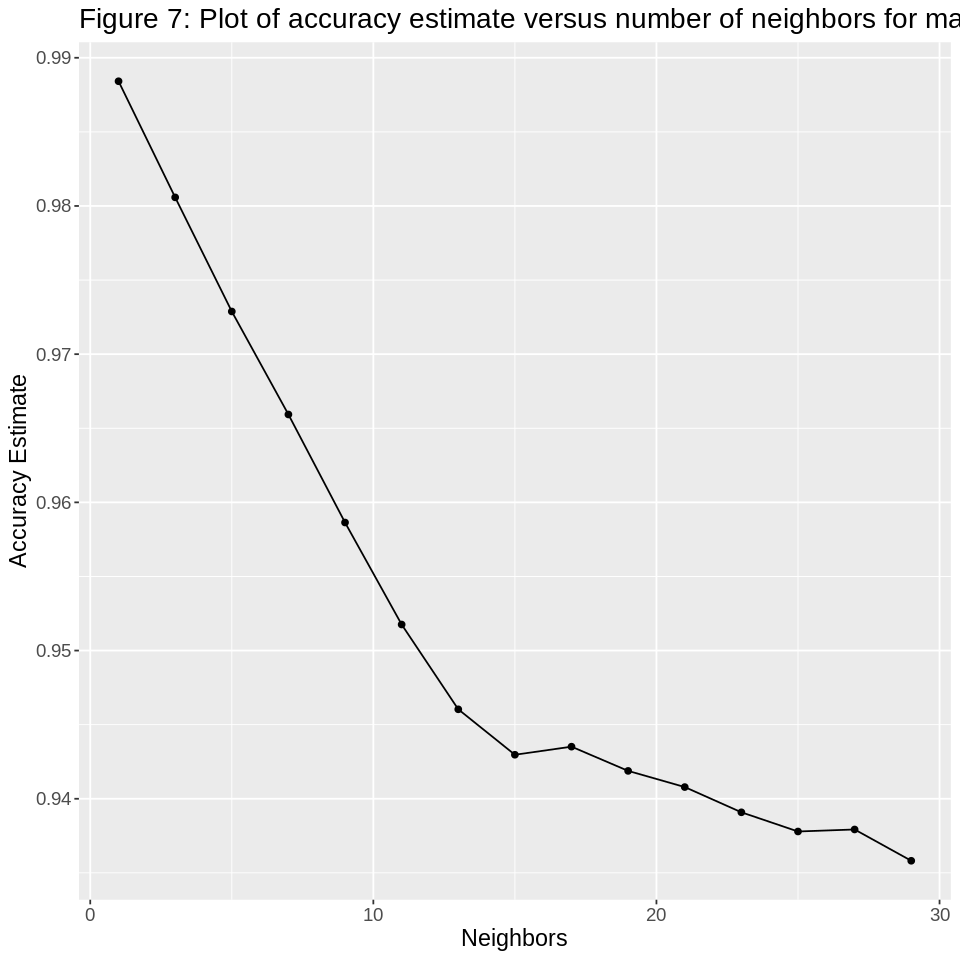

In [27]:
options(repr.plot.width = 8, repr.plot.height = 8) 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  ggtitle("Figure 7: Plot of accuracy estimate versus number of neighbors for many K values")+
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 14))
accuracy_vs_k

Firstly, we choose to see only odd k values to avoid each group have same number of votes. Also, we did not chooes to use value greater than 30 since we would like to avoid underfitting. As we can see from the graph, the accuracy decreases as k increase when k is small. This implies that there is presence of uncertainty for small k. Therefore, I would choose k equals to 17 in this case since the accuracy is still good and there is much smaller uncertainty here. 

In [29]:
#training the model with chosen k and getting accuracy from testing set.

knn_spec_17 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 17) %>%
  set_engine("kknn") %>%
  set_mode("classification")
pulsar_workflow <- workflow() %>% 
                add_recipe(pulsar_recipe) %>%
                add_model(knn_spec_17) %>%
                fit(data = rebalanced_pulsar)
prediction <- pulsar_workflow %>%
              predict(pulsar_test_tidy) %>%
              bind_cols(pulsar_test_tidy) 
result <- prediction%>%
              metrics(truth = target_class, estimate = .pred_class)
result

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.927804
kap,binary,0.642283


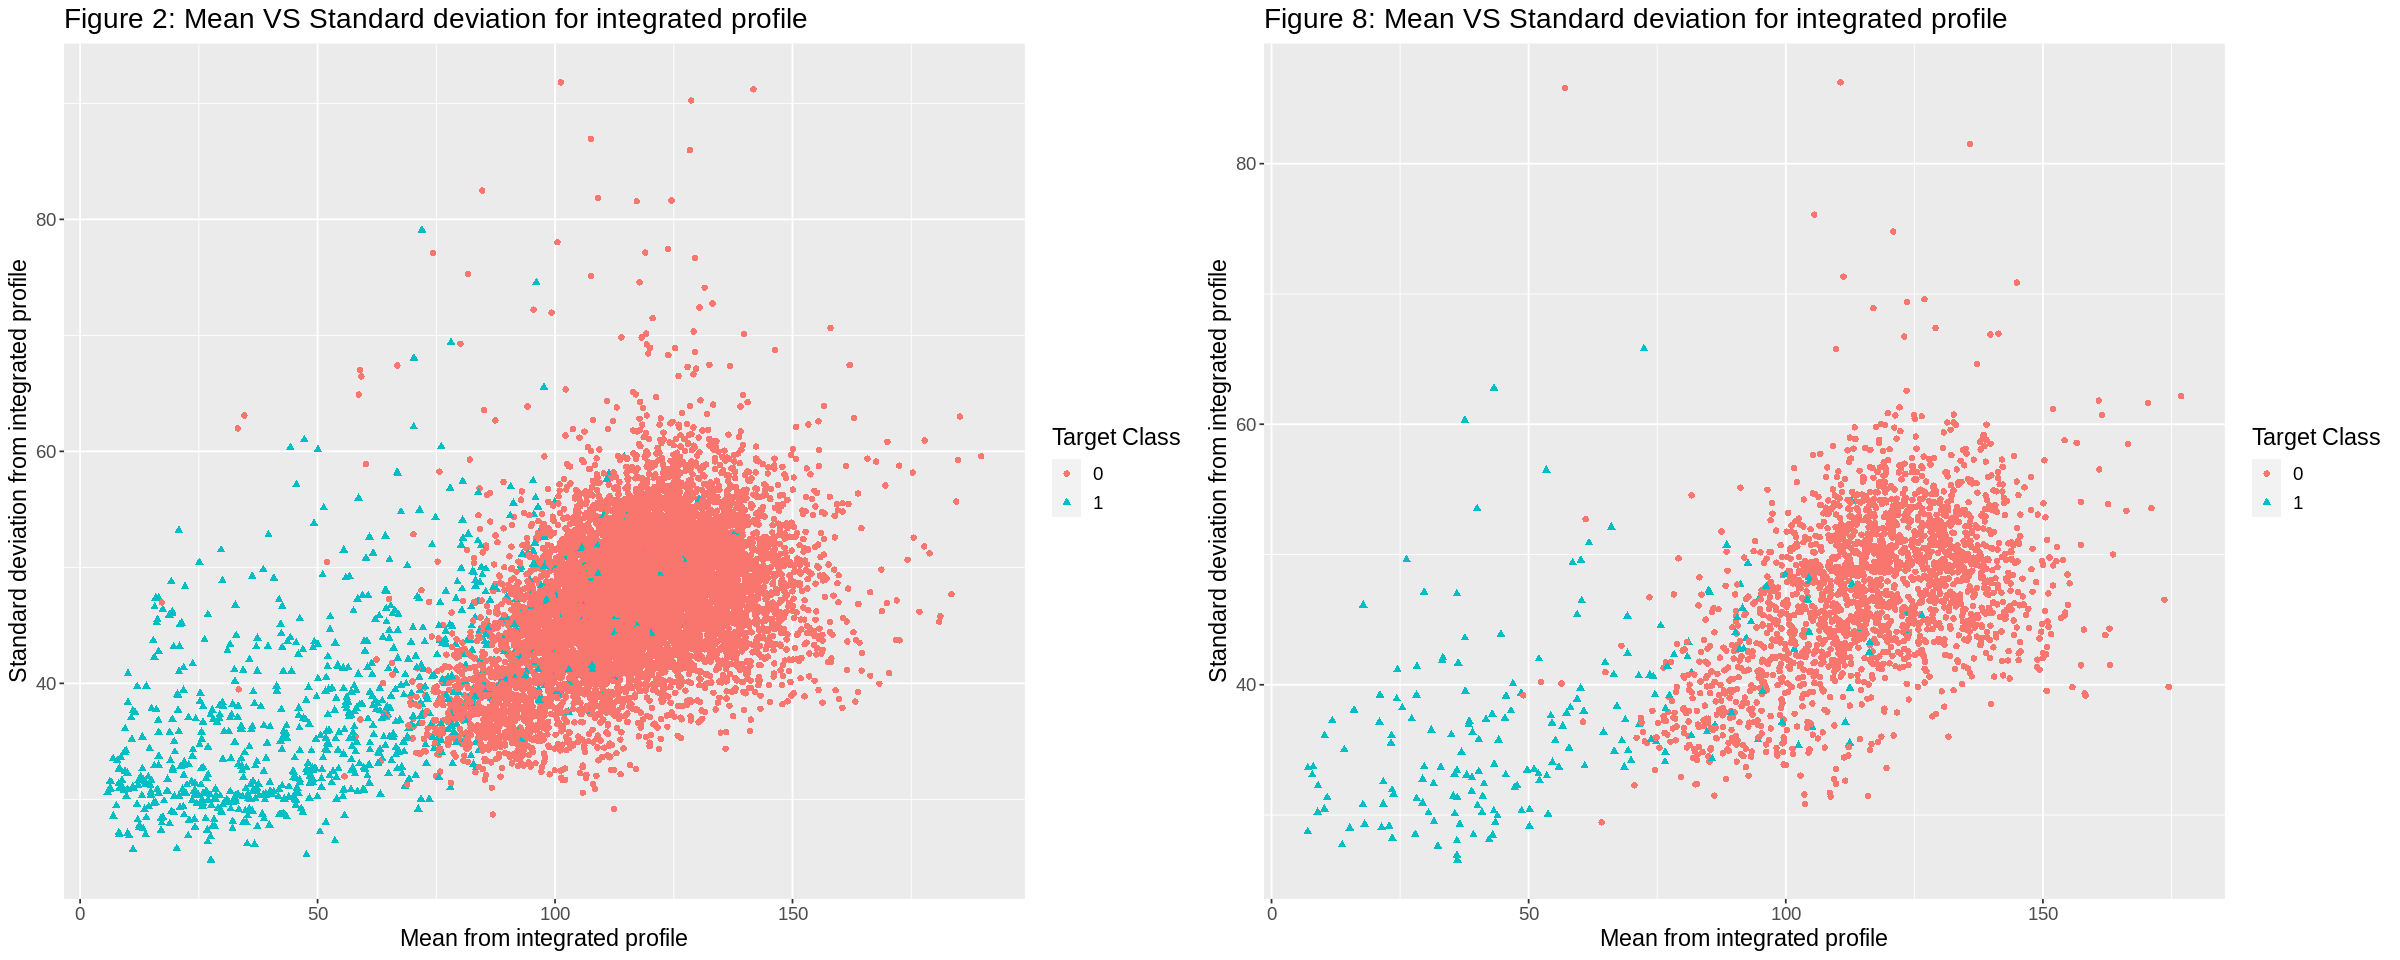

In [42]:
# visualization of the analysis, and compare the test data with train data
options(repr.plot.width = 20, repr.plot.height = 8)
test_result_plot <- ggplot(pulsar_test_tidy, 
            aes(x = integrated_profile_mean, y = integrated_profile_standard_deviation, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Figure 8: Mean VS Standard deviation for integrated profile")+
labs(x = "Mean from integrated profile", y = "Standard deviation from integrated profile", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 14))

plot_grid(Integrated_profile_plot, test_result_plot) 

Figure 2 is the plot of mean vs standard deviation from integrated profile from the original dataset, showing how the target classes distributed in these two variables. Figure 8 is the plot of mean vs standard deviation from integrated profile from the testing subset, showing how the predicted target classes distributed in these two variables. 

## Section 5: Discussion

Our model predicts unknown pulsar stars based on 17 nearest neighbors' values, and the accuracy of our model is 92.78%. Before we build the model, we expect that our model will correctly predict the class of the testing data majority of the time. The model turns out to be the same as what we expected. Since our model is accurate majority of the time, it can be used as a guide to help identify pulsars more efficiently since many detections of signals are actually caused by radio frequency interference (RFI) and noise, and real signals from pulsars are sometimes hard to find (Lyon et al., 2016). However, as the proportion of real pulsar data is relatively small compare to non-pulsar in our training set, a future question could be that can accuracy be improved by increasing the proportion of real-pulsar as this help our model know real-pulsar better?

#### References
Cofield, C. (2016, April 22). *What are pulsars?* Space.com. Retrieved November 6, 2021, from https://www.space.com/32661-pulsars.html. 

Lyon, R. J., Stappers, B. W., Cooper, S., Brooke, J. M., &amp; Knowles, J. D. (2016). *Fifty Years of     pulsar candidate selection: From simple filters to a new principled real-time classification approach.* Monthly Notices of the Royal Astronomical Society, 459(1), 1104–1123. https://doi.org/10.1093/mnras/stw656. 

Wikimedia Foundation. (2021, October 22). *Pulsar.* Wikipedia. Retrieved November 6, 2021, from https://en.wikipedia.org/wiki/Pulsar.